# Iris Klassifizierung

## Datenset laden und prüfen

Wir laden zuerst einmal das Iris Datenset aus der Datei *data/iris.csv* als DataFrame.

In [2]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

df_iris = pd.read_csv('../data/iris.csv', header=0)

Wir zeigen nun mal die ersten fünf Datensätze (Data Samples) an.

In [3]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**Aufgabe 1.1**

Zeige die wichtigsten Informationen über das Dataframe an. Nutze die gelernten Befehle  `df`, `df.shape`, `df.info()` und `df.describe()`


In [4]:
#Infos hier ausgeben
df_iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Wenn wir auf ein bestimmtes Sample (hier mit Index 3) zugreifen wollen, können wir dies per Indizierung machen:

In [7]:
idx_sample = 3
df_iris.iloc[idx_sample]

sepal_length       4.6
sepal_width        3.1
petal_length       1.5
petal_width        0.2
species         setosa
Name: 3, dtype: object

Die Klassen, zu denen die jeweiligen Samples gehören, sind in iris der Spalte "species" gespeichert. Wir schauen uns die Häufigkeit der Kategorien an.

In [8]:
df_iris["species"].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

**Aufgabe 1.2**

Zeige nun für eine gegebene Sample ID die verschiedenen Features an (sepal_length, etc.)

In [9]:
# Zeige für den Datensatz mit der ID 7 an
df_iris.iloc[7]

sepal_length       5.0
sepal_width        3.4
petal_length       1.5
petal_width        0.2
species         setosa
Name: 7, dtype: object

### Klassifikation

Wir haben im Unterricht gesehen, dass man die Iris Blumen anhand der *petal length* und *petal width* relativ gut auseinanderhalten kann.

Wir zeigen nun nochmals das Diagramm an, welches die beiden Features für alle drei Spezies plotted.

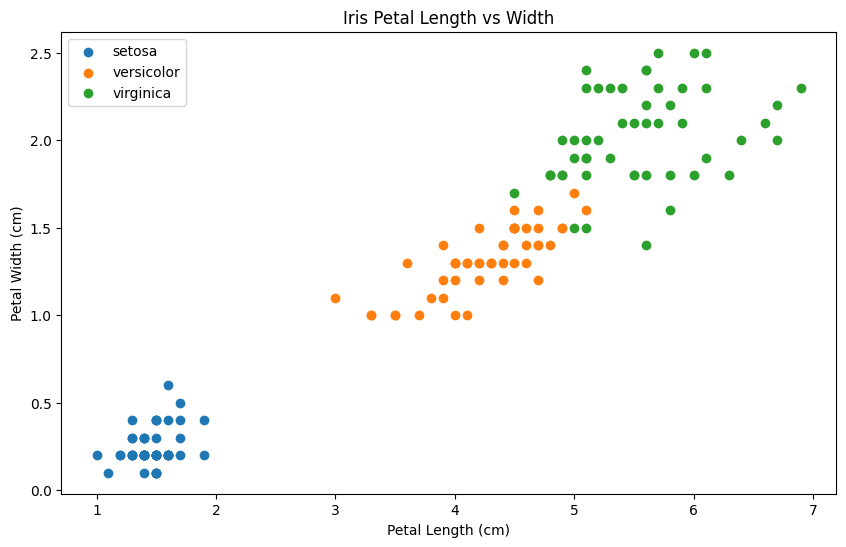

In [10]:
# plot the iris sepal length and width in a scatter plot and color by species
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
for species in df_iris["species"].unique():
    subset = df_iris[df_iris["species"] == species]
    plt.scatter(subset["petal_length"], subset["petal_width"], label=species)
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("Iris Petal Length vs Width")
plt.legend()
plt.show()

Wir unterteilen nun die Daten in Trainings- und Testdaten. X beinhaltet dabei alle Features. y beinhaltet die einzelnen Labels also die Spezies der Blume.

Wir nutzen dazu eine Library scikit-learn, welche viele nützliche Funktionen und Modelle zur Verfügung stellt, um Machine Learning zu implementieren.

**Aufgabe 1.4**

Lese den Code unten. In welchem Verhältnis werden die Trainings- und Testdaten aufgeteilt?

In [ ]:
from sklearn.model_selection import train_test_split

X = df_iris[["petal_length", "petal_width"]]
y = df_iris["species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)



**Aufgabe 1.5**

Programmiere nun wie im Unterricht zuvor besprochen, eine Funktion, welche Anhand von Petal Länge und Petal Breite entscheidet, um welche Gattung es sich handelt. Nutze das unten vorgegebene Konstrukt, welches auch bereits auswertet, wie genau die Klassifikationen sind.

In [12]:
# Die Funktion soll für gegebene Merkmale die Irisklasse vorhersagen. Sie gibt entweder 'setosa', 'versicolor' oder 'virginica' zurück.
def classify_iris(petal_length, petal_width):
    # HIER regelbasierten Klassifikator implementieren
    if petal_length < 2.0:
        return 'setosa'
    elif petal_length < 5.0:
        return 'versicolor'
    else:
        return 'virginica'



# -----------------------------
# Ab hier den Code so belassen

def evaluate_classifier():
    nb_correct = 0 
    nb_incorrect = 0
    
    for i in range(len(X_test)):
        pred = classify_iris(X_test.iloc[i]["petal_length"], X_test.iloc[i]["petal_width"])
        true = y_test.iloc[i]
        if pred == true:
            nb_incorrect += 1
        else:
            nb_correct += 1
    accuracy = nb_incorrect / (nb_incorrect + nb_correct)
    print(f"Accuracy: {accuracy:.2f}")

evaluate_classifier()

Accuracy: 0.93


Die Genauigkeit also Accuracy wird hier gemessen indem die Anzahl korrekter Klassifikationen durch die totale Anzahl an Klassifikationen geteilt wird.

**Aufgabe 1.6**

Welche Accuracy hat der Classifier erreicht?

Lese nun oben in der  Funktion `evaluate_classifier()` wie die Accuracy berechnet wird.
Beschreibe in eigenen Worten wie man die Accuracy berechnet.


**Zusatzaufgabe**

Wenn nun der random_state in der Zelle mit dem train_test_split(...) geändert wird. Ändert sich auch die Accuracy? Setze den random_state auf eine andere natürliche Zahl.
Weshalb ist dies der Fall? Recherchiere über den Randomstate.





### k-NN Classifier

Wir nutzen nun einen k-nearest Neighbours Classifier um diesen mit dem regelbasierten Classifier zu Vergleichen.

**Aufgabe 1.7** 

Lese im Internet nach, wie der k-NN Classifier funktioniert.

Mache nachher unten Versuche, indem du die Anzahl Nachbarn also Neighbours veränderst. Ab welchem Wert von Nachbarn ist die Accuracy auf 1.0?



In [13]:
# KNN Classifier

number_of_neighbors = 2

knn = KNeighborsClassifier(n_neighbors=number_of_neighbors)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = (y_pred == y_test).mean()

print(f"KNN Classifier Accuracy: {accuracy:.2f}")

KNN Classifier Accuracy: 0.97
